# Single-Path Impulse Geometry

This notebook implements the simplest non-trivial construction in
Impulse Geometry: a single impulse-driven trajectory in ℝ².

Geometry is not prescribed. Instead, it arises by integrating a local
impulse defined by intrinsic generator variables.

We introduce:
- position x ∈ ℝ² (shape space)
- generator magnitude ρ
- generator orientation θ


In [22]:
import numpy as np
import matplotlib.pyplot as plt

from iglab.core.state import State
from iglab.systems.single_path import SinglePathSystem


In [23]:
def impulse(state):
    """
    Polar impulse defined by generator variables (ρ, θ).
    """
    return state.rho * np.array([
        np.cos(state.theta),
        np.sin(state.theta)
    ])


In [33]:
s0 = State(
    x=np.array([0.0, 0.0]),
    s=0.0,
    rho=1.0,
    theta=0.0
)


In [34]:
sys = SinglePathSystem(
    initial_state=s0,
    impulse_fn=impulse,
    dt=0.05
)


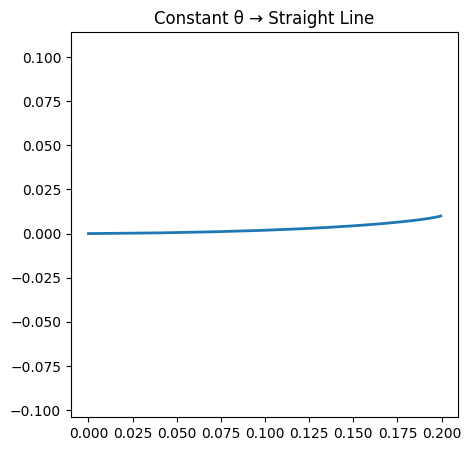

In [42]:
sys.run(200)
traj = np.array(sys.trajectory())

plt.figure(figsize=(5, 5))
plt.plot(traj[:, 0], traj[:, 1], lw=2)
plt.axis("equal")
plt.title("Constant θ → Straight Line")
plt.show()


In [77]:
s0 = State(
    x=np.array([0.0, 0.0]),
    s=0.0,
    rho=1.0,
    theta=0.0
)

sys = SinglePathSystem(
    initial_state=s0,
    impulse_fn=impulse,
    dt=0.05
)


In [78]:
for _ in range(400):
    sys.state.theta += 0.15   # update generator FIRST
    sys.state.rho *= 0.999
    sys.step()


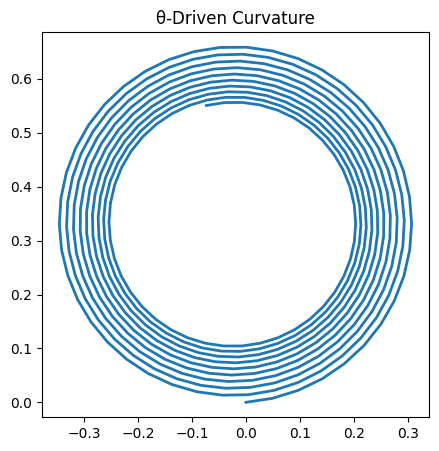

In [79]:
traj = np.array(sys.trajectory())

plt.figure(figsize=(5, 5))
plt.plot(traj[:, 0], traj[:, 1], lw=2)
plt.axis("equal")
plt.title("θ-Driven Curvature")
plt.show()


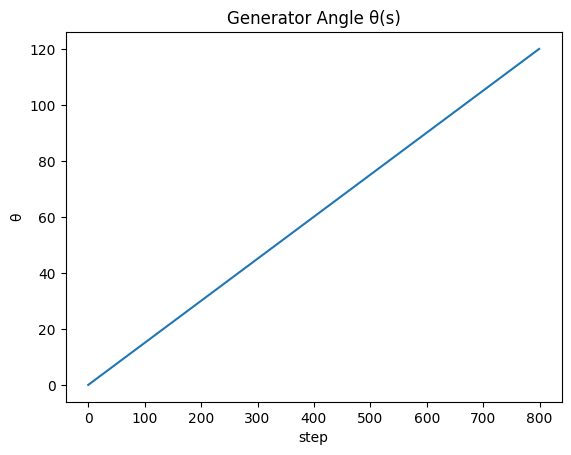

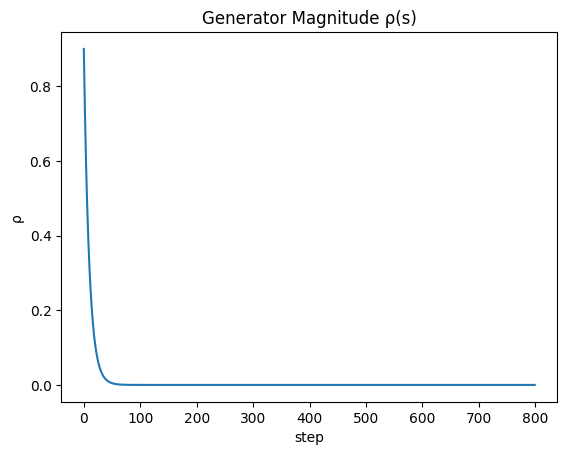

In [76]:
thetas = [s.theta for s in sys.history]
rhos = [s.rho for s in sys.history]

plt.figure()
plt.plot(thetas)
plt.xlabel("step")
plt.ylabel("θ")
plt.title("Generator Angle θ(s)")
plt.show()

plt.figure()
plt.plot(rhos)
plt.xlabel("step")
plt.ylabel("ρ")
plt.title("Generator Magnitude ρ(s)")
plt.show()
